In [1]:
%matplotlib inline

In [2]:
# Using Random Forest for Classification. RF are good because
# they're very robust to overfitting and perform well in a
# variety of situations.

In [3]:
# RF work by constructing a lot of very shallow trees, and then
# taking a vote of the class that each tree "voted" for. This
# idea is powerful in machine learning. If we assume that one
# classifier is only right 60% of the time, we can train multiple
# classifiers and they are generally right and learn together.

In [4]:
# Actions:
#   1. Create a sample dataset.
#   2. Train a basic random forest object.
#   3. Take a look at some attributes of a trained object.

In [5]:
from sklearn.datasets import make_classification

In [6]:
X, y = make_classification(1000)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
# print accuracy on training data:
print "Accuracy:\t", (y == rf.predict(X)).mean()

Accuracy:	0.996


In [11]:
print "Total Correct:\t", (y == rf.predict(X)).sum()

Total Correct:	996


In [12]:
# Looking at useful attributes:
#  -> rf.criterion: Determines splits. default: 'gini'.
#  -> rf.bootstrap: Bool determines use of bootstrap samples.
#  -> rf.n_jobs: # of jobs (processors) to train/predict.
#  -> rf.max_features: # of features to determine a split.
#  -> rf.max_depth: how each tree goes.

In [13]:
# predict isn't only useful method. We can get the probability
# of each class from individual samples.

In [20]:
probs = rf.predict_proba(X)
probs[:5]

array([[ 0. ,  1. ],
       [ 1. ,  0. ],
       [ 0. ,  1. ],
       [ 0.2,  0.8],
       [ 0. ,  1. ]])

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
probs_df = pd.DataFrame(probs, columns=['0','1'])
probs_df['was_correct'] = rf.predict(X) == y

,0,1,was_correct
0,0.0,1.0,True
1,1.0,0.0,True
2,0.0,1.0,True
3,0.2,0.8,True
4,0.0,1.0,True
5,1.0,0.0,True
6,0.3,0.7,True
7,0.0,1.0,True
8,1.0,0.0,True
9,0.0,1.0,True


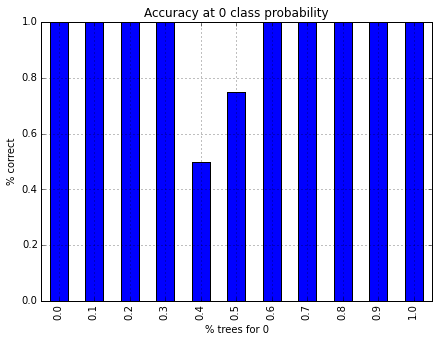

In [17]:
f, ax = plt.subplots(figsize=(7,5))
probs_df.groupby('0').was_correct.mean().plot(kind='bar', ax=ax)
ax.set_title("Accuracy at 0 class probability")
ax.set_ylabel('% correct')
ax.set_xlabel('% trees for 0')

In [21]:
# we can use RF to determine feature importance.

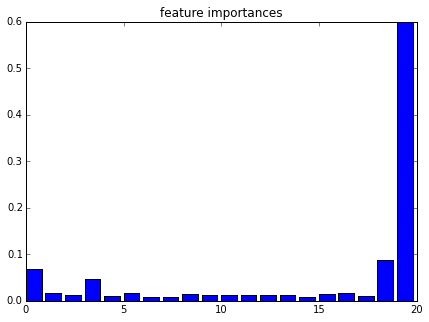

In [31]:
f, ax = plt.subplots(figsize=(7,5))
ax.bar(range(0, len(rf.feature_importances_)), rf.feature_importances_)
ax.set_title('feature importances')

In [35]:
importances = pd.DataFrame(rf.feature_importances_)
importances.sort(0, ascending=False)

,0
19,0.598794
18,0.088215
0,0.067985
3,0.047320
16,0.017112
5,0.016041
1,0.015733
15,0.014727
8,0.014089
12,0.013343
